In [ ]:
#import all libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as splg

Text(0, 0.5, 'Probability')

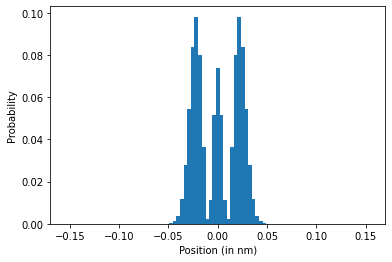

In [ ]:
#constants used
hbar_si = 1.0545718e-34    # [m^2 kg/s] hbar (reduced plank's constant) in SI units
hbar = 6.58e-16            # [eV*s] hbar (reduced plank's constant)
m_amu = 6                  # [amu] mass of oscillator in amu
amu2eV = 931.5e6           # [eV] convert amu to eV [E = m * c^2]
c_nm = 2.997e17            # [nm/s] the speed of light
c_cm = 2.997e10            # [cm/s] the speed of light
m = m_amu*amu2eV/(c_nm**2) # [eV*s^2/nm^2] mass of oscillator
w = 2*np.pi*300*c_cm       # [rad/s] angular frequency of the oscillator

def creation(N):
  diag_entry = np.array([np.sqrt(n) for n in range(1, N)])
  a = np.diag(diag_entry, 1)
  return a

def annihilation(N):
  diag_entry = np.array([np.sqrt(n) for n in range(1, N)])
  a = np.diag(diag_entry, -1)
  return a

def Hamiltonian(N):
  a = creation(N)
  a_dag = annihilation(N)
  H = hbar*w*(np.matmul(a_dag, a) + (1/2)*np.identity(N))
  return H # [eV] the Hamiltonian has units eV

def position(N):
  a = creation(N)
  a_dag = annihilation(N)
  x = np.sqrt(hbar/(2*m*w))*(a + a_dag)
  return x # [nm] The position operator has units nm

#takes in the total number of energy eigenstates and the nth energy eigenstate required
def energy_eigenvector(N, n): 
  v_n = np.zeros(N)
  v_n[n] = 1
  return v_n

def displacement(N, alpha):
  a = creation(N)
  a_dag = annihilation(N)
  D = splg.expm(alpha*a_dag - np.conjugate(alpha)*a)
  return D

def time_evol(H, t):
  i = complex(0, 1)
  U = splg.expm(-i*H*t/hbar)
  return U

def energy_to_pos_base(v):
  N = len(v)
  X = position(N)
  eigval, P2E = np.linalg.eig(X)
  E2P = np.transpose(P2E)
  v_p = np.matmul(E2P, v)
  return v_p


#number of eigenstates used
N = 71
n = 2  #ground energy eigenstate

#define the energy eigenstate
state = energy_eigenvector(N, n)
state_conj = np.conjugate(state) #conjugate of the state

#define the energy eigenstate in position basis
X = position(N)
eigval, P2E = np.linalg.eig(X)
E2P = np.transpose(P2E)
state_p = np.matmul(E2P, state)
state_conj_p = np.conjugate(state_p) #conjugate of the state

#probability for each energy basis state
prob_dist_energy_basis = state_conj*state

#probability for each position basis state
prob_dist_pos_basis = state_conj_p*state_p

#plot the probability distribution
plt.bar(eigval, prob_dist_pos_basis, width=0.004) #will have to change width according to the value of N. Higher N requires lower width
plt.xlabel("Position (in nm)")
plt.ylabel("Probability")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0, 0.5, 'Position state (relative)')

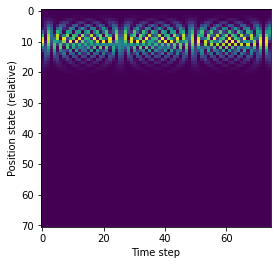

In [ ]:
#Part 2: Plotting the time evolution

#number of eigenstates used
N = 71
n = 0  #ground energy eigenstate
#alpha for displacement
alpha = complex(3, 1) #change the values to use a different alpha
E0 = hbar*w*0.5  # [eV] zero point energy (energy scale for timesteps)
T0 = hbar/E0     # [s] time scale
T = 5            # [T0] Amount of time we want to simulate for in units of T0
nt = 75          # number of timesteps
t = np.linspace(0, T*T0, nt) #vector containing time points

#create all required operators
D = displacement(N, alpha)
H = Hamiltonian(N)
X = position(N)

#transformation matrix
eigval, P2E = np.linalg.eig(X)
E2P = np.transpose(P2E)

#create the ground energy eigenstate
state = energy_eigenvector(N, n)

#create the Coherent state using displacement operator
coh_state_0 = np.matmul(D, state)

#create empty arrays to store states
coh_state_t_E = np.zeros((N, nt))
coh_state_t_X = np.zeros((N, nt))

#run the time evolution
for i in range(nt):
  Ut = time_evol(H, t[i]) #define the time evolution operator
  coh_state_t_E[:, i] = np.matmul(Ut, coh_state_0) #apply time evolution in energy basis
  coh_state_t_X[:, i] = np.matmul(E2P, coh_state_t_E[:, i])

#calculate probability densities
pd_t_E = np.conjugate(coh_state_t_E)*coh_state_t_E
pd_t_X = np.conjugate(coh_state_t_X)*coh_state_t_X

#visualize
plt.imshow(pd_t_E)
plt.xlabel("Time step")
plt.ylabel("Position state (relative)")